In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import random
#import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing directory to images
os.chdir("/content/drive/MyDrive/")

In [ ]:
# Check Classes 
image_names=list(os.listdir("Database/"))
image_names.sort()
print(image_names)
class_number = len(image_names)

['COVID19', 'NORMAL', 'Viral_Pneumonia']


In [ ]:
device = tf.test.gpu_device_name()
device

'/device:GPU:0'

In [ ]:
# MODEL 

data_dir = "Database/"
batch_size = 128
img_height, img_width = 224,224
epochs = 50

In [ ]:
# MODEL TRAINING


datagen= ImageDataGenerator(rescale=1/255,validation_split=.3,rotation_range=20,
                           shear_range=.2,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2)

# Flow training images in batches of batch_size using train_data 
train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical", 
                classes= image_names,
                shuffle=True, 
                seed=30)


datagen2=ImageDataGenerator(rescale=1/255,validation_split=.3)

val_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= image_names,
                class_mode="categorical", 
                subset="validation", 
                shuffle=True, 
                seed=30)

## For evaluation
eval_train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical", 
                classes= image_names,
                shuffle=False, 
                seed=30)

eval_val_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= image_names,
                class_mode="categorical", 
                subset="validation", 
                shuffle=False, 
                seed=30)

Found 2919 images belonging to 3 classes.
Found 1250 images belonging to 3 classes.
Found 2919 images belonging to 3 classes.
Found 1250 images belonging to 3 classes.


In [ ]:
VGG16_classifier=VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(img_height, img_width, 3)))

for layer in VGG16_classifier.layers:
    layer.trainable=False

with tf.device(device):
  VGG16_model = tf.keras.Sequential([
                                     VGG16_classifier,
                                     MaxPooling2D(),
                                     Dense(img_height, activation='relu'),
                                     Flatten(),
                                     Dense(class_number, activation='softmax')
                                     ])

  VGG16_model.compile(
      optimizer='adam',
      loss=tf.losses.CategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
      )
  
  VGG16_model_history = VGG16_model.fit(
      train_generator,
      validation_data=val_generator,
      epochs=epochs,
      verbose=1
      )

Epoch 1/50
23/23 [==============================] - 85s 4s/step - loss: 1.0880 - accuracy: 0.5365 - val_loss: 0.4054 - val_accuracy: 0.8840
Epoch 2/50
23/23 [==============================] - 83s 4s/step - loss: 0.4197 - accuracy: 0.8624 - val_loss: 0.3423 - val_accuracy: 0.8712
Epoch 3/50
23/23 [==============================] - 82s 4s/step - loss: 0.2980 - accuracy: 0.9026 - val_loss: 0.3222 - val_accuracy: 0.8680
Epoch 4/50
23/23 [==============================] - 82s 4s/step - loss: 0.2545 - accuracy: 0.9134 - val_loss: 0.3149 - val_accuracy: 0.8760
Epoch 5/50
23/23 [==============================] - 82s 4s/step - loss: 0.2472 - accuracy: 0.9112 - val_loss: 0.2666 - val_accuracy: 0.8992
Epoch 6/50
23/23 [==============================] - 83s 4s/step - loss: 0.2205 - accuracy: 0.9251 - val_loss: 0.3015 - val_accuracy: 0.8808
Epoch 7/50
23/23 [==============================] - 82s 4s/step - loss: 0.2063 - accuracy: 0.9320 - val_loss: 0.3087 - val_accuracy: 0.8792
Epoch 8/50
23/23 [==

In [ ]:
# Train loss/ Train Accuracy
train_loss, train_acc = VGG16_model.evaluate(train_generator)
print("\n Train Accuracy:", train_acc)
print("\n Train Loss:", train_loss)

23/23 [==============================] - 66s 3s/step - loss: 0.0763 - accuracy: 0.9746

 Train Accuracy: 0.9746488332748413

 Train Loss: 0.07632502168416977


In [ ]:
# Test Loss/ Test Accuracy
test_loss, test_acc= VGG16_model.evaluate(val_generator)
print("\n Test Accuracy:", test_acc)
print("\n Test Loss:", test_loss)

10/10 [==============================] - 18s 2s/step - loss: 0.3777 - accuracy: 0.8704

 Test Accuracy: 0.8704000115394592

 Test Loss: 0.3776688873767853


INFO:tensorflow:Assets written to: VGG16_model/assets


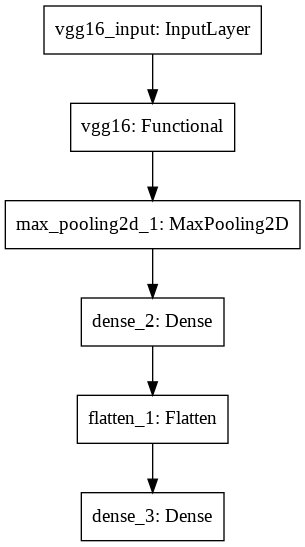

In [ ]:
# Save Model 
VGG16_model.save('VGG16_model')
VGG16_model.save('VGG16_model/VGG16_model.h5')

VGG16_model_history_df = pd.DataFrame(VGG16_model_history.history) 
VGG16_model_history_df.to_csv('VGG16_model/history.csv')

tf.keras.utils.plot_model(
    VGG16_model, to_file='VGG16_model/architecture.png', show_shapes=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
# Print Confusion Matrix for Analysis

filenames = val_generator.filenames
nb_samples = len(filenames)


Y_pred = VGG16_model.predict_generator(val_generator,np.ceil(nb_samples/batch_size))
y_pred = np.argmax(Y_pred, axis=1)

print('VGG16_model Confusion Matrix')
conf_matrix = pd.DataFrame(
    confusion_matrix(val_generator.classes, y_pred), 
    index=['true: COVID19', 'true: NORMAL','true: Viral_Pneumonia'], 
    columns=['pred: COVID19', 'pred: NORMAL','pred: Viral_Pneumonia']
)
conf_matrix.to_csv("VGG16_model/confusion_matrix.csv")
print(conf_matrix)
print('\n')
print('Classification Report')
target_names = list(val_generator.class_indices.keys())
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


VGG16_model Confusion Matrix
                       pred: COVID19  pred: NORMAL  pred: Viral_Pneumonia
true: COVID19                    109           187                    102
true: NORMAL                     133           156                    115
true: Viral_Pneumonia            132           185                    131


Classification Report
                 precision    recall  f1-score   support

        COVID19       0.29      0.27      0.28       398
         NORMAL       0.30      0.39      0.33       404
Viral_Pneumonia       0.38      0.29      0.33       448

       accuracy                           0.32      1250
      macro avg       0.32      0.32      0.32      1250
   weighted avg       0.32      0.32      0.32      1250



In [ ]:
model.metrics_names

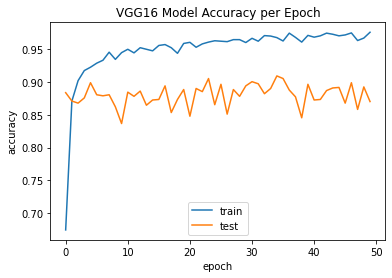

In [ ]:
# PLOT ACCURACY
plt.plot(VGG16_model_history.history['accuracy'])
plt.plot(VGG16_model_history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy per Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower center')
plt.show()

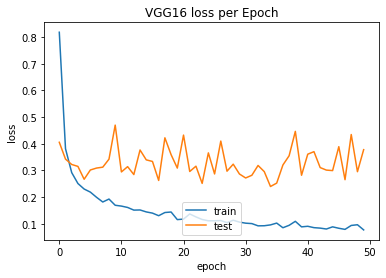

In [ ]:
# PLOT LOSS
plt.plot(VGG16_model_history.history['loss'])
plt.plot(VGG16_model_history.history['val_loss'])
plt.title('VGG16 loss per Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower center')
plt.show()